In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

In [147]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [148]:
custom_color=["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette=sns.set_palette(sns.color_palette(custom_color))

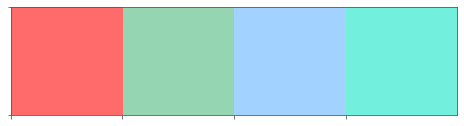

In [149]:
sns.palplot(sns.color_palette(custom_color),size=2)

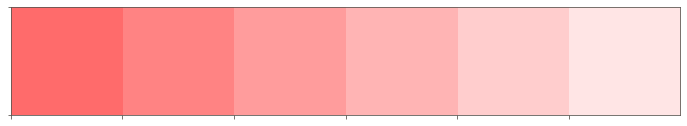

In [150]:
net=sns.light_palette(custom_color[0],reverse=True)
sns.palplot(sns.color_palette(net),size=2)

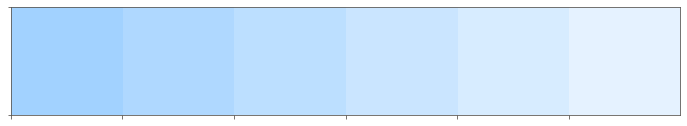

In [151]:
prie_v=sns.light_palette(custom_color[2],reverse=True)
sns.palplot(sns.color_palette(prie_v),size=2)

In [152]:
df_tv=pd.read_csv('file:///F:/net/tv_shows.csv')
df_movie=pd.read_csv('file:///F:/net/MoviesOnStreamingPlatforms_updated.csv')

In [153]:
df_tv=df_tv.drop(['Unnamed: 0'],axis=1)
df_tv

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [154]:
df_movie=df_movie.drop(['Unnamed: 0','ID'],axis=1)
df_movie

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [155]:
len(df_movie['Directors'].unique())

11339

In [156]:
df_movie.Genres.unique()

array(['Action,Adventure,Sci-Fi,Thriller', 'Action,Sci-Fi',
       'Action,Adventure,Sci-Fi', ..., 'Comedy,Family,Fantasy,Mystery',
       'Family,Drama,Western', 'Comedy,Family,Adventure,Fantasy,Sci-Fi'],
      dtype=object)

In [157]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [158]:
val_counts = []
dfs = [df_movie,df_tv]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [159]:
val_counts

[3560, 903, 12354, 564, 1931, 1754, 2144, 180]

In [160]:
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Genres'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()

In [161]:
sunburst(df_movie,'Netflix','amp')

In [162]:
sunburst(df_movie,'Hulu','Blugrn')

In [163]:
sunburst(df_movie,'Prime Video','haline')

In [164]:
sunburst(df_movie,'Disney+','dense')

In [165]:
def kde(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Runtime'], color=custom_colors[c],shade=True)
    plt.xlabel('Runtime in minutes', fontsize = 15)
    plt.legend(fontsize = 15);
    plt.subplot(i+1)
    sns.kdeplot(data=dataframe['Year'], color=custom_colors[c],shade=True)
    plt.xlabel('Release Year', fontsize = 15)
    plt.legend(fontsize = 15);

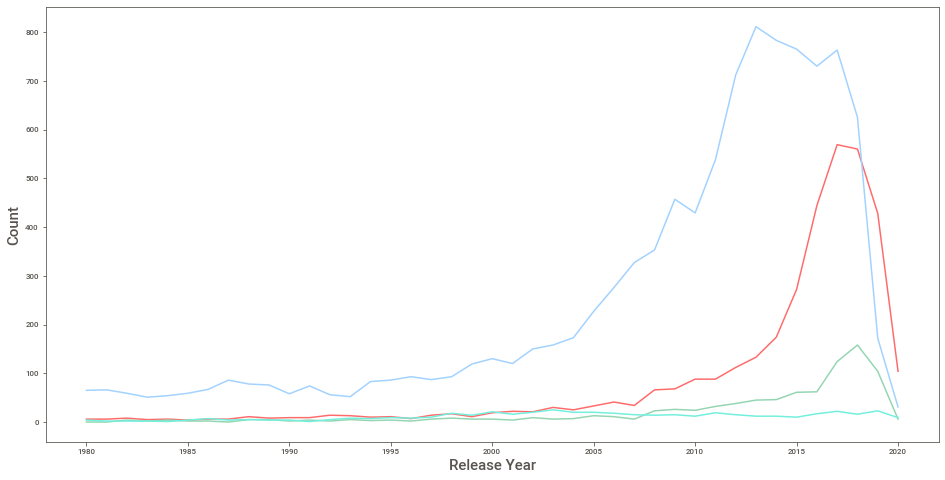

In [166]:
post_1980 = df_movie[df_movie.Year >= 1980]
year_movies = post_1980.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movies.index,y=year_movies['Netflix'])
sns.lineplot(x=year_movies.index,y=year_movies['Hulu'])
sns.lineplot(x=year_movies.index,y=year_movies['Prime Video'])
sns.lineplot(x=year_movies.index,y=year_movies['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [167]:
df_t = df_tv.copy()
df_t = df_t[df_t['Age'].notna()]

In [168]:
df_t['Age']=df_t['Age'].str.replace('+','')
df_t['Age']=df_t['Age'].str.replace('all','0')
df_t['Age']=df_t['Age'].astype(str).astype(int)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [169]:
def barplot(i,dataframe,platform,p):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe = dataframe['Age'].value_counts().reset_index()
    dataframe.columns=['age','count']
    sns.barplot(x="age", y="count", data=dataframe,palette=p)
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel(platform, fontsize = 15)

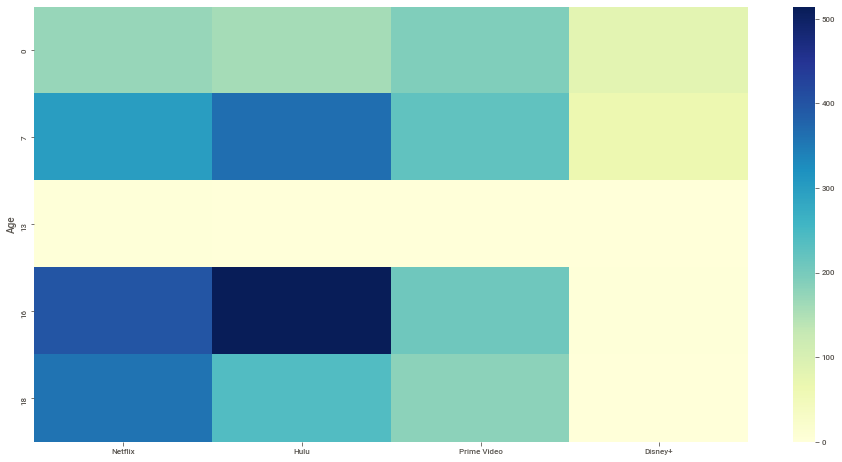

In [170]:
plt.figure(figsize = (16, 8))
tv_age = df_t.groupby('Age')[['Netflix','Hulu','Prime Video','Disney+']].sum()
sns.heatmap(tv_age,cmap="YlGnBu")
plt.show()

In [171]:
r1 = df_movie.sort_values(by='IMDb', ascending=False)
r1 = r1[0:10]
r1['Movies']='Movies'
fig = px.treemap(r1, path=['Movies','Title', 'Genres','Language'], values='IMDb',color='IMDb',color_continuous_scale='Purp')
fig.show()


In [172]:
def dist(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.distplot(dataframe['IMDb'], color=custom_colors[c],vertical=True)
    
    plt.ylabel('IMDb rating, '+platform, fontsize = 15)
    plt.subplot(i+1)
    sns.distplot(dataframe['Rotten Tomatoes'], color=custom_colors[c],vertical=True)
    plt.ylabel('Rotten Tomatoes, '+platform, fontsize = 15)

In [173]:
df_tv

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [174]:
import sweetviz as sv

In [175]:
data=sv.analyze(df_tv)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [176]:
from IPython.display import IFrame

In [177]:
IFrame(src='Analyze.html',width=1000,height=600)

In [178]:
from dataprep.eda import *

In [179]:
data=sv.analyze(df_tv)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [180]:
data=sv.analyze(df_tv)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [181]:
IFrame(src='Analyze.html',width=1000,height=600)

In [182]:
df_tv

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [183]:
df_movie

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [184]:
df_tv.fillna(0)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,0,0.0,0,0,0,0,1,1
5607,Paradise Islands,2017,0,0.0,0,0,0,0,1,1
5608,Wild Russia,2018,0,0.0,0,0,0,0,1,1
5609,Love & Vets,2017,0,0.0,0,0,0,0,1,1


In [185]:
df_movie.fillna(0)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,0,6.2,0,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,0,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,0,5.7,0,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0
16742,Man Among Cheetahs,2017,0,6.6,0,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0


In [186]:
df_tv.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [187]:
df_movie.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [188]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1011 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
 9   type             5611 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 438.5+ KB


In [189]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


In [190]:
df_tv.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'type'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272872E21C8>,
      dtype=object)

<Figure size 1000x1000 with 0 Axes>

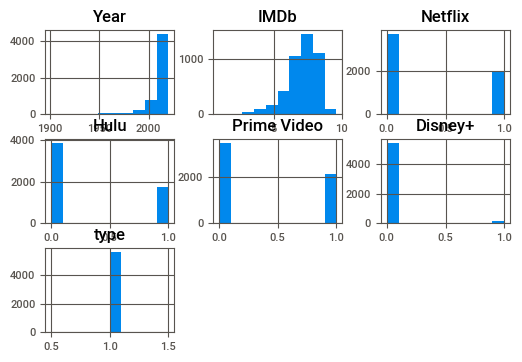

In [191]:
plt.figure(figsize=(10,10))
df_tv.hist()

In [192]:
df_tv.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'type'],
      dtype='object')

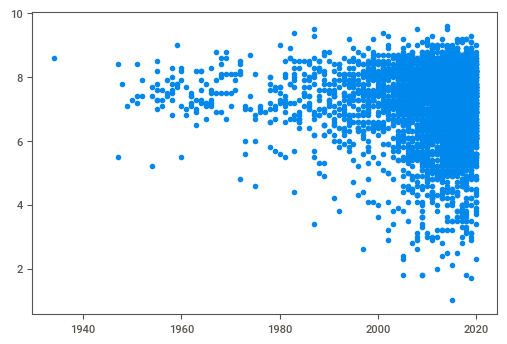

In [193]:
plt.scatter(df_tv[['Year']],df_tv['IMDb'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 <a list of 88 Text xticklabel objects>)

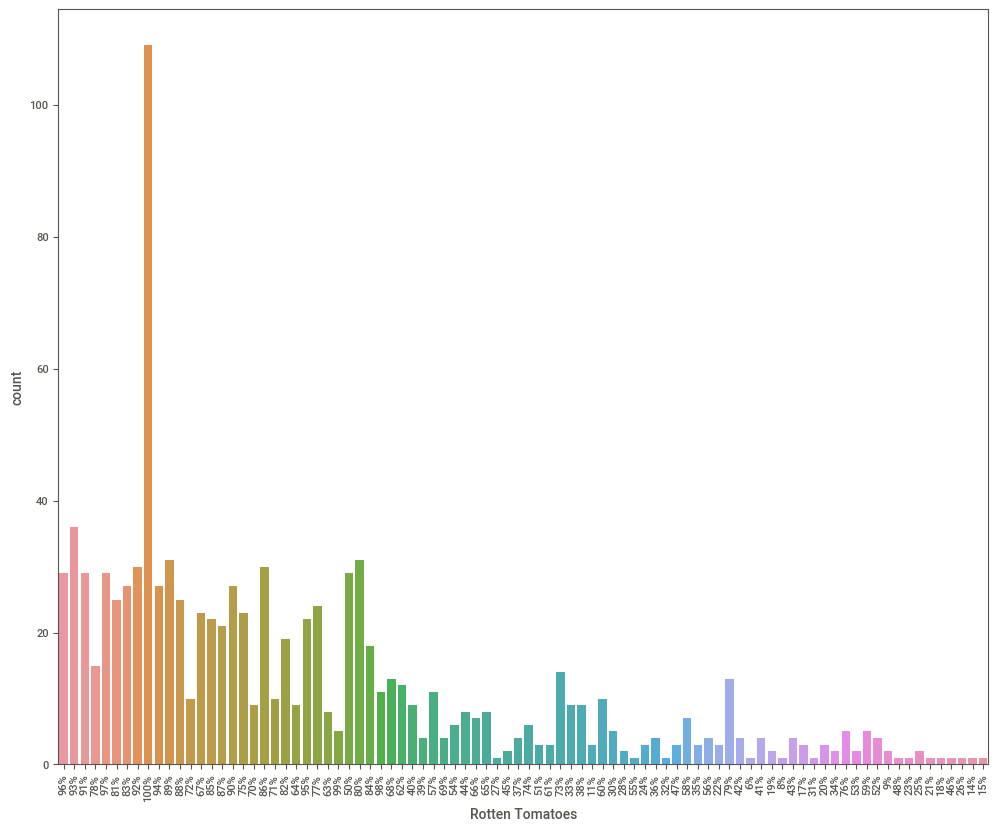

In [194]:
plt.figure(figsize=(12,10))
sns.countplot(df_tv['Rotten Tomatoes'])
plt.xticks(rotation = 90)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Text xticklabel objects>)

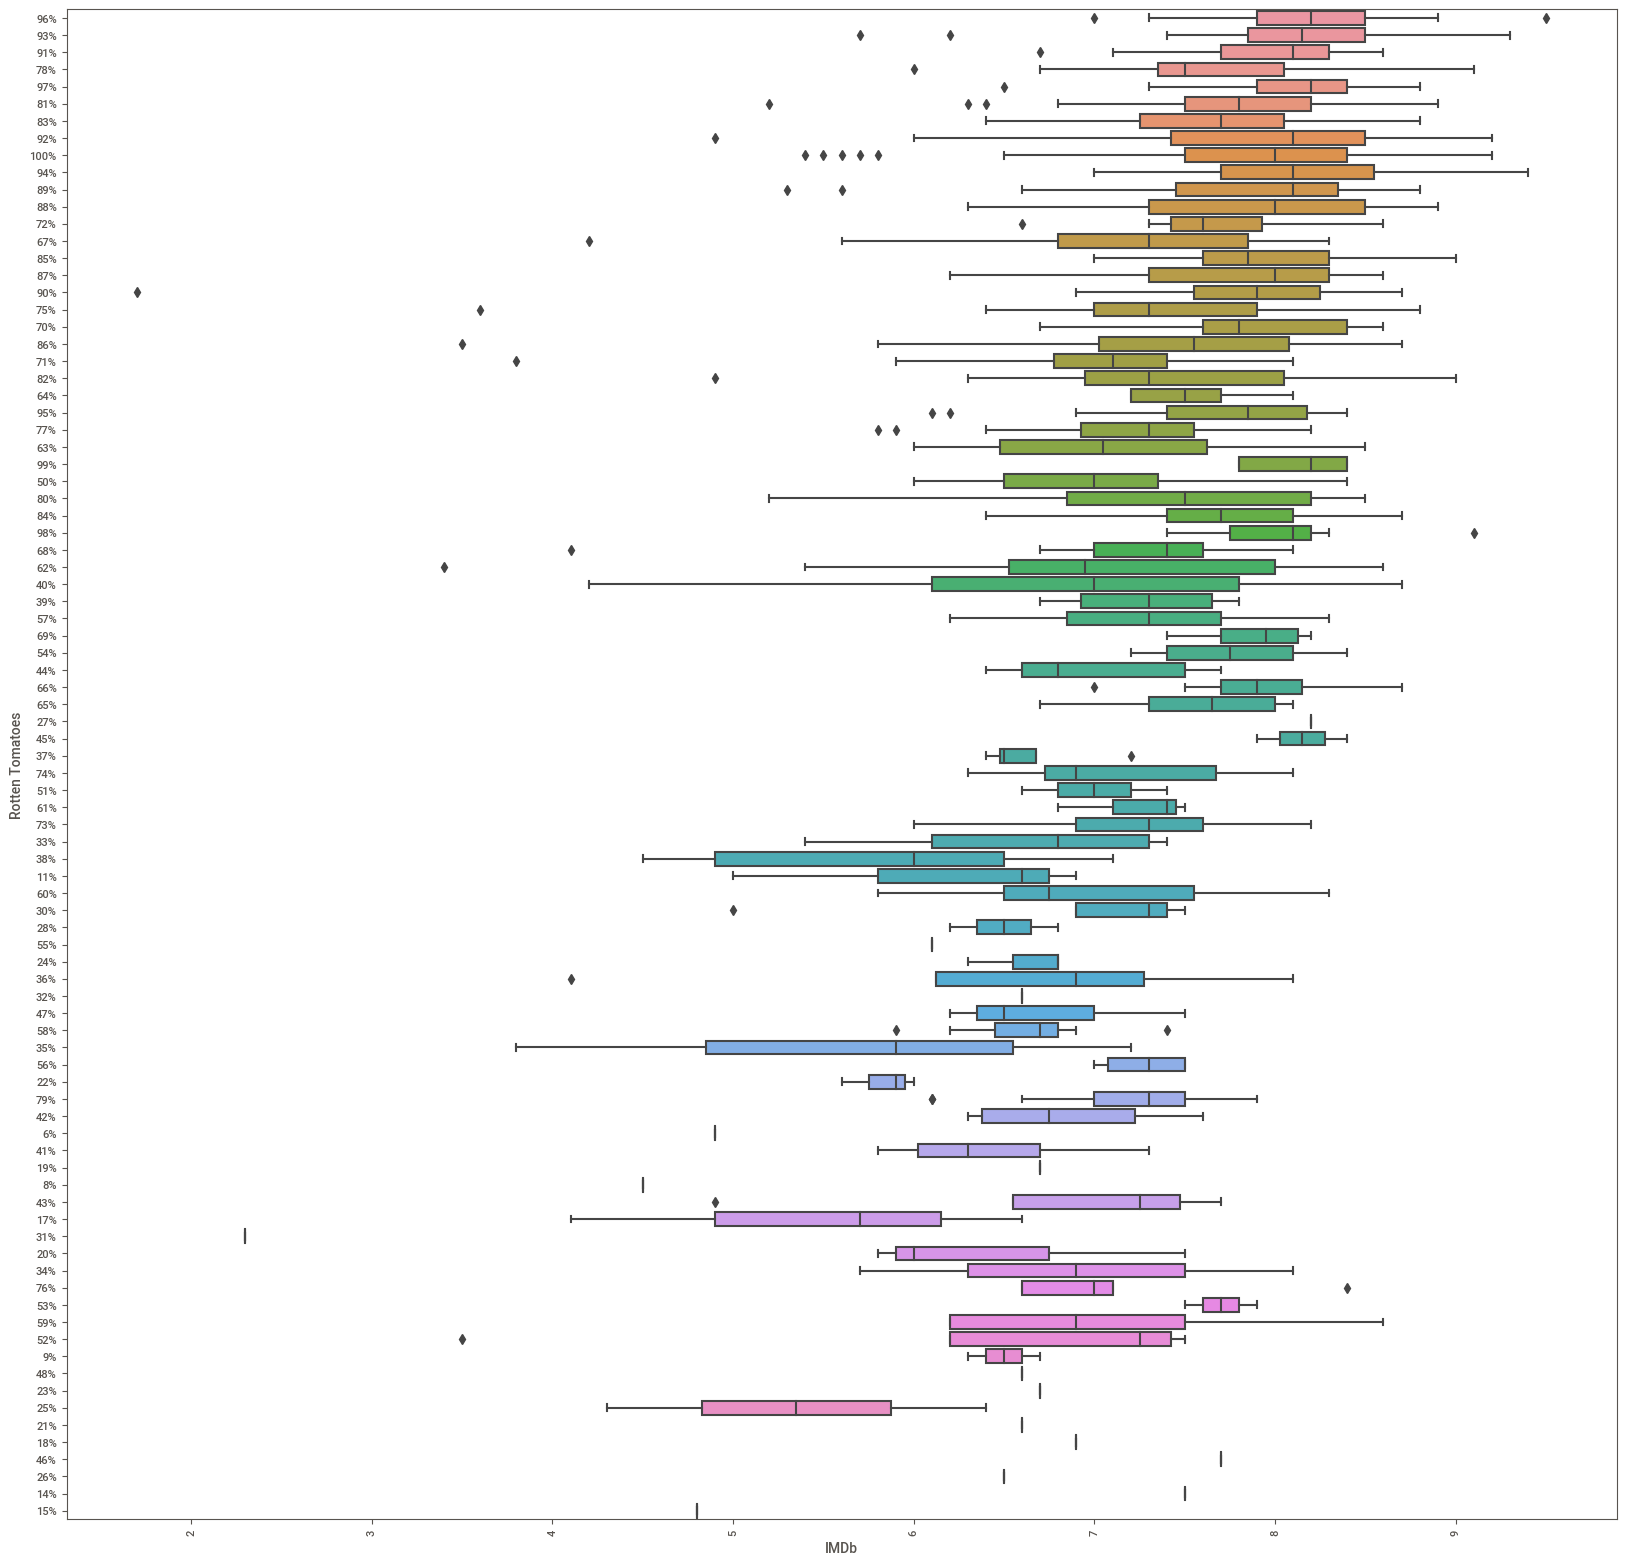

In [195]:
plt.figure(figsize=(20,20))
sns.boxplot(x='IMDb',y='Rotten Tomatoes',data=df_tv)
plt.xticks(rotation = 90)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

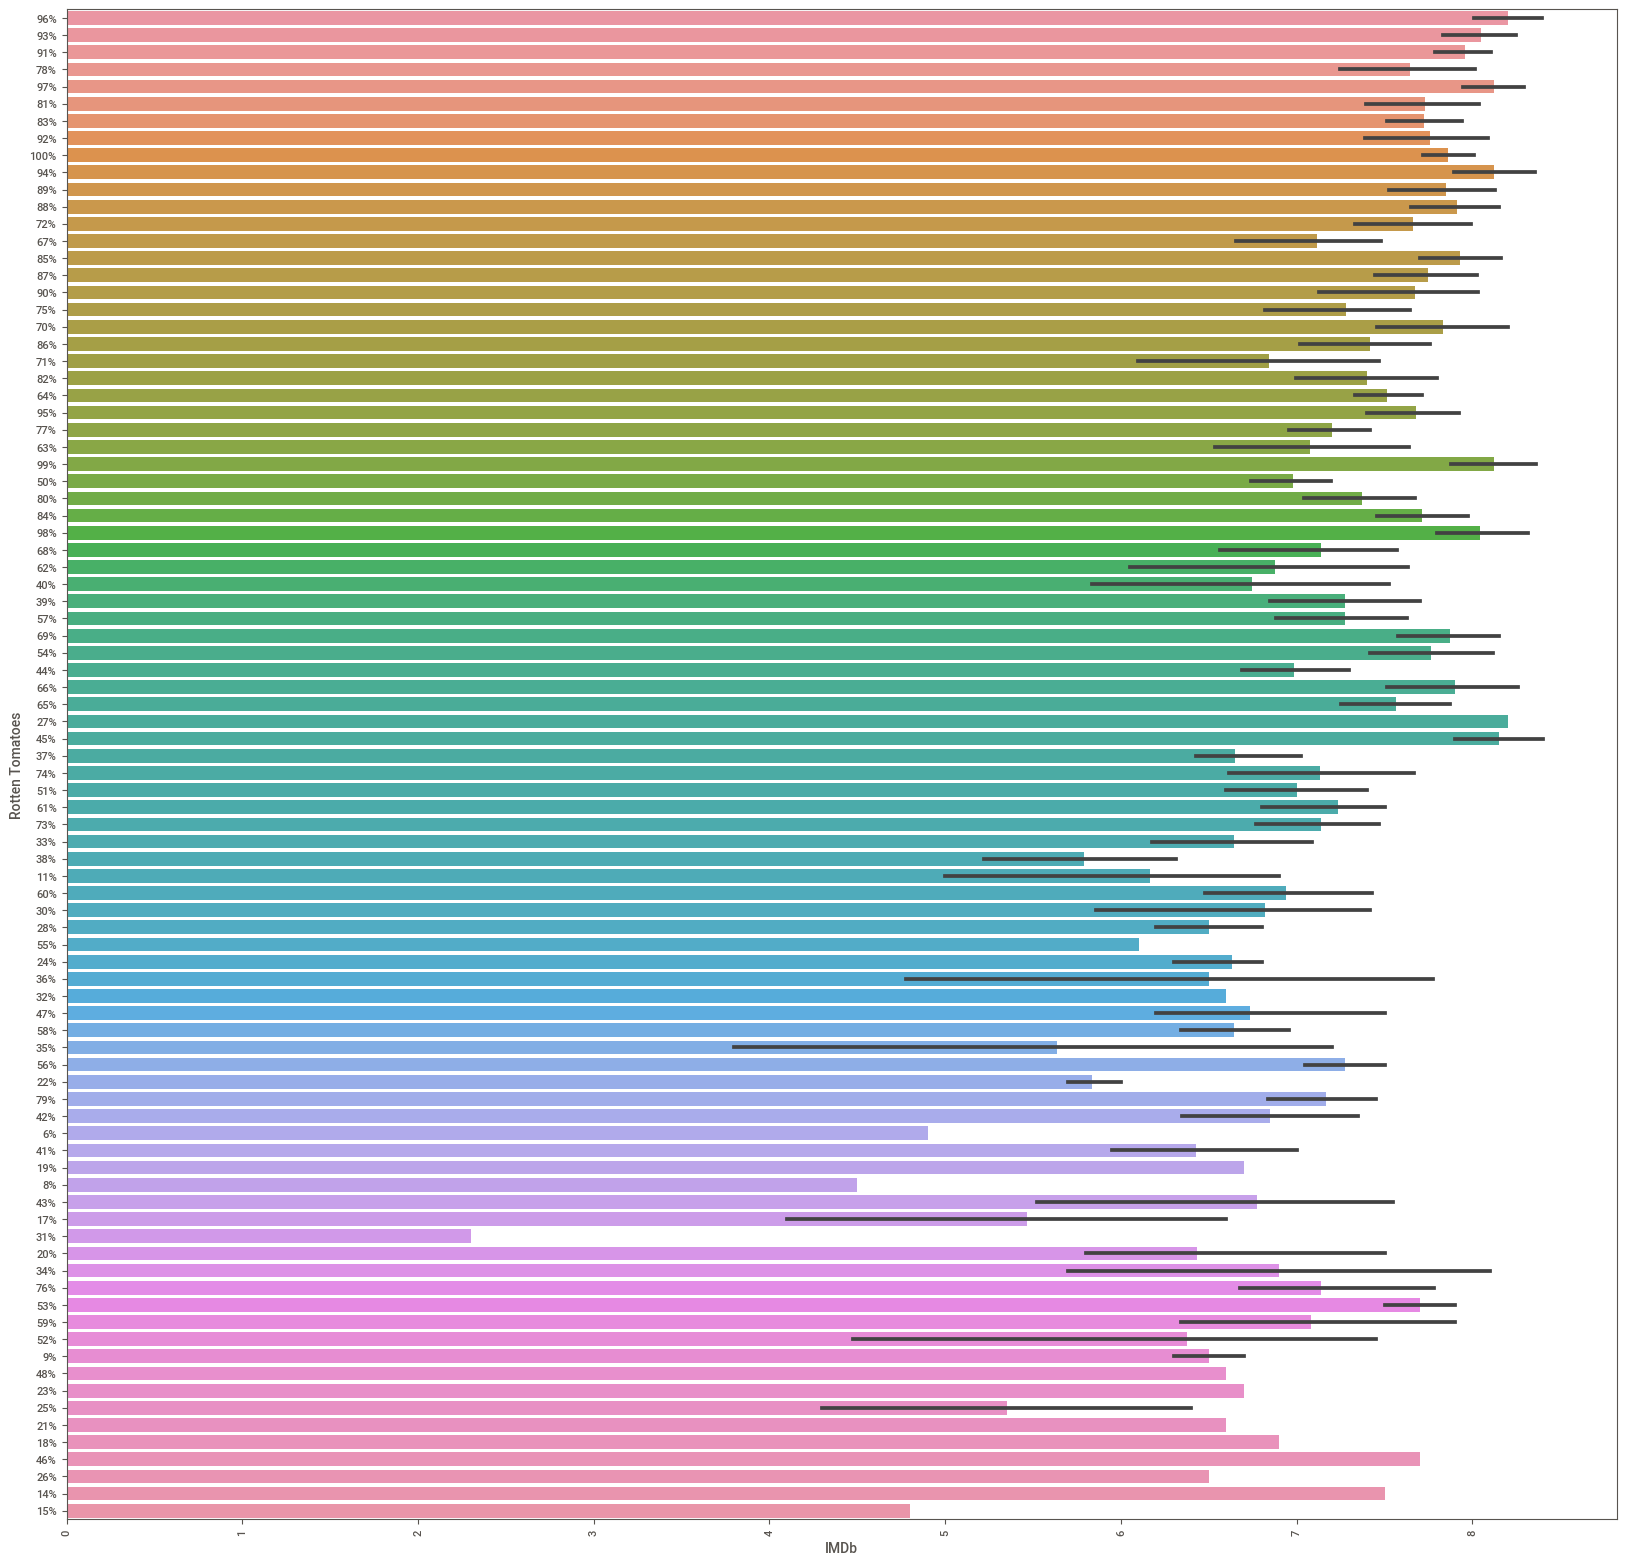

In [196]:
plt.figure(figsize=(20,20))
sns.barplot(df_tv['IMDb'],df_tv['Rotten Tomatoes'])
plt.xticks(rotation = 90)

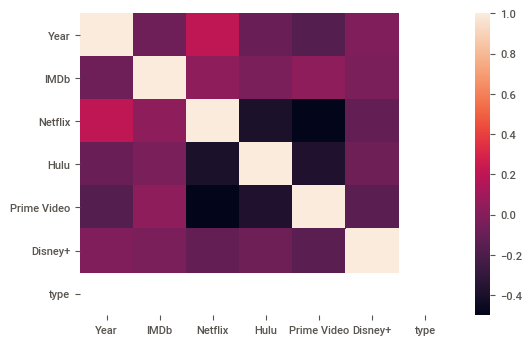

In [197]:
sns.heatmap(df_tv.corr())

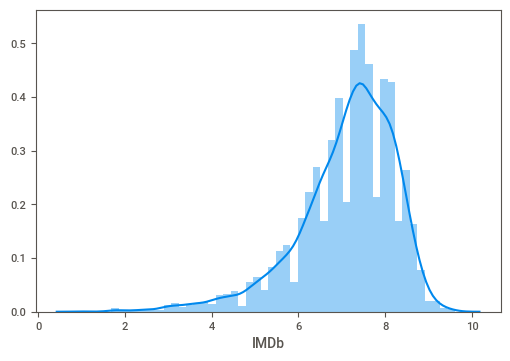

In [198]:
sns.distplot(df_tv['IMDb'])

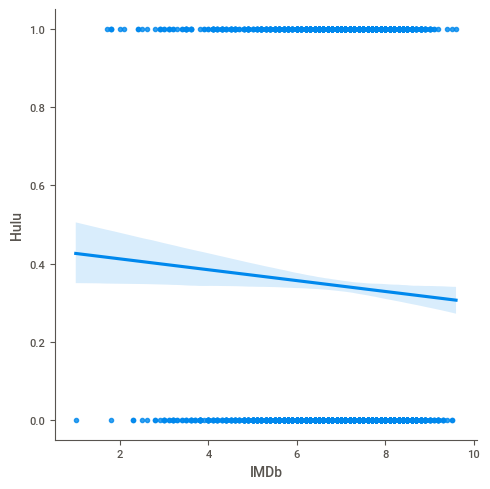

In [199]:
sns.lmplot(x='IMDb',y='Hulu',data=df_tv)

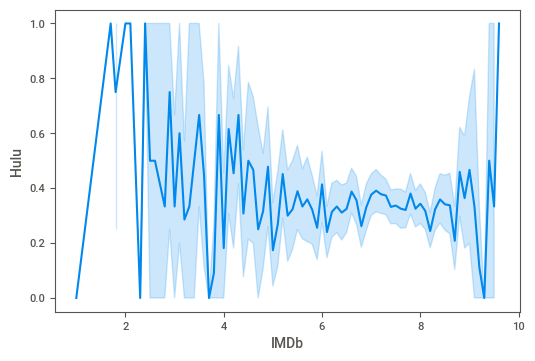

In [200]:
sns.lineplot(x='IMDb',y='Hulu',data=df_tv)

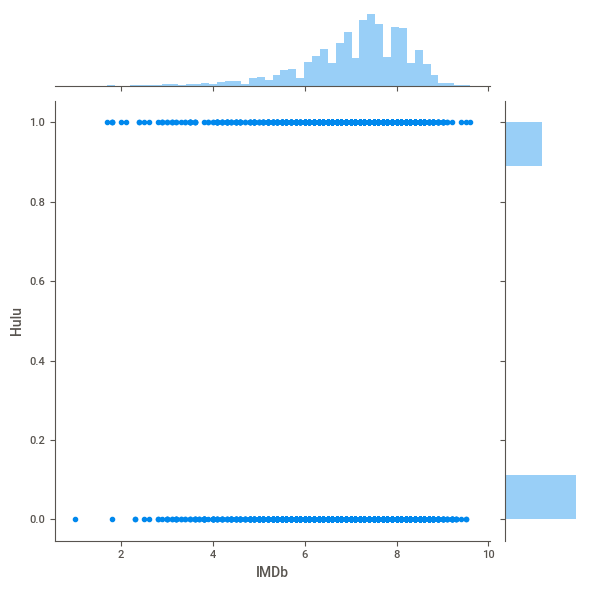

In [201]:
sns.jointplot(x='IMDb',y='Hulu',data=df_tv)

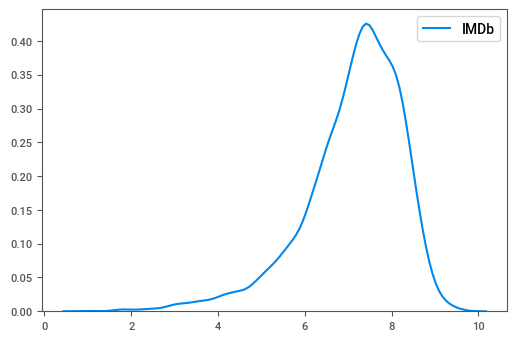

In [202]:
sns.kdeplot(df_tv['IMDb'])

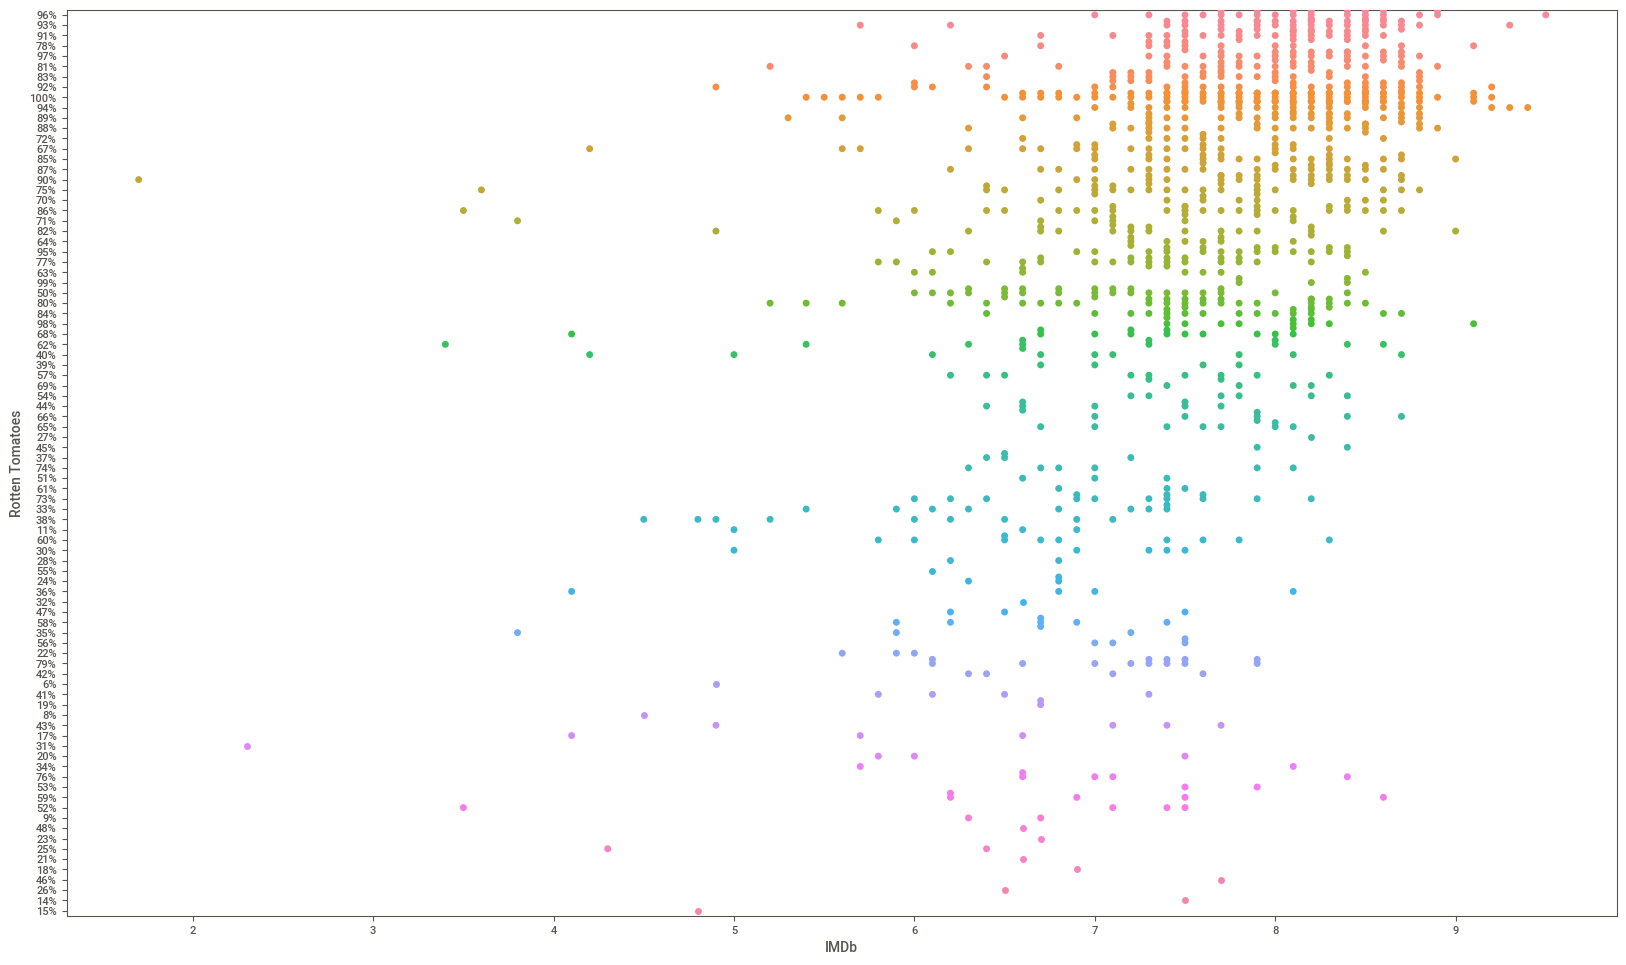

In [203]:
plt.figure(figsize=(20,12))
sns.swarmplot(x='IMDb',y='Rotten Tomatoes',data=df_tv)

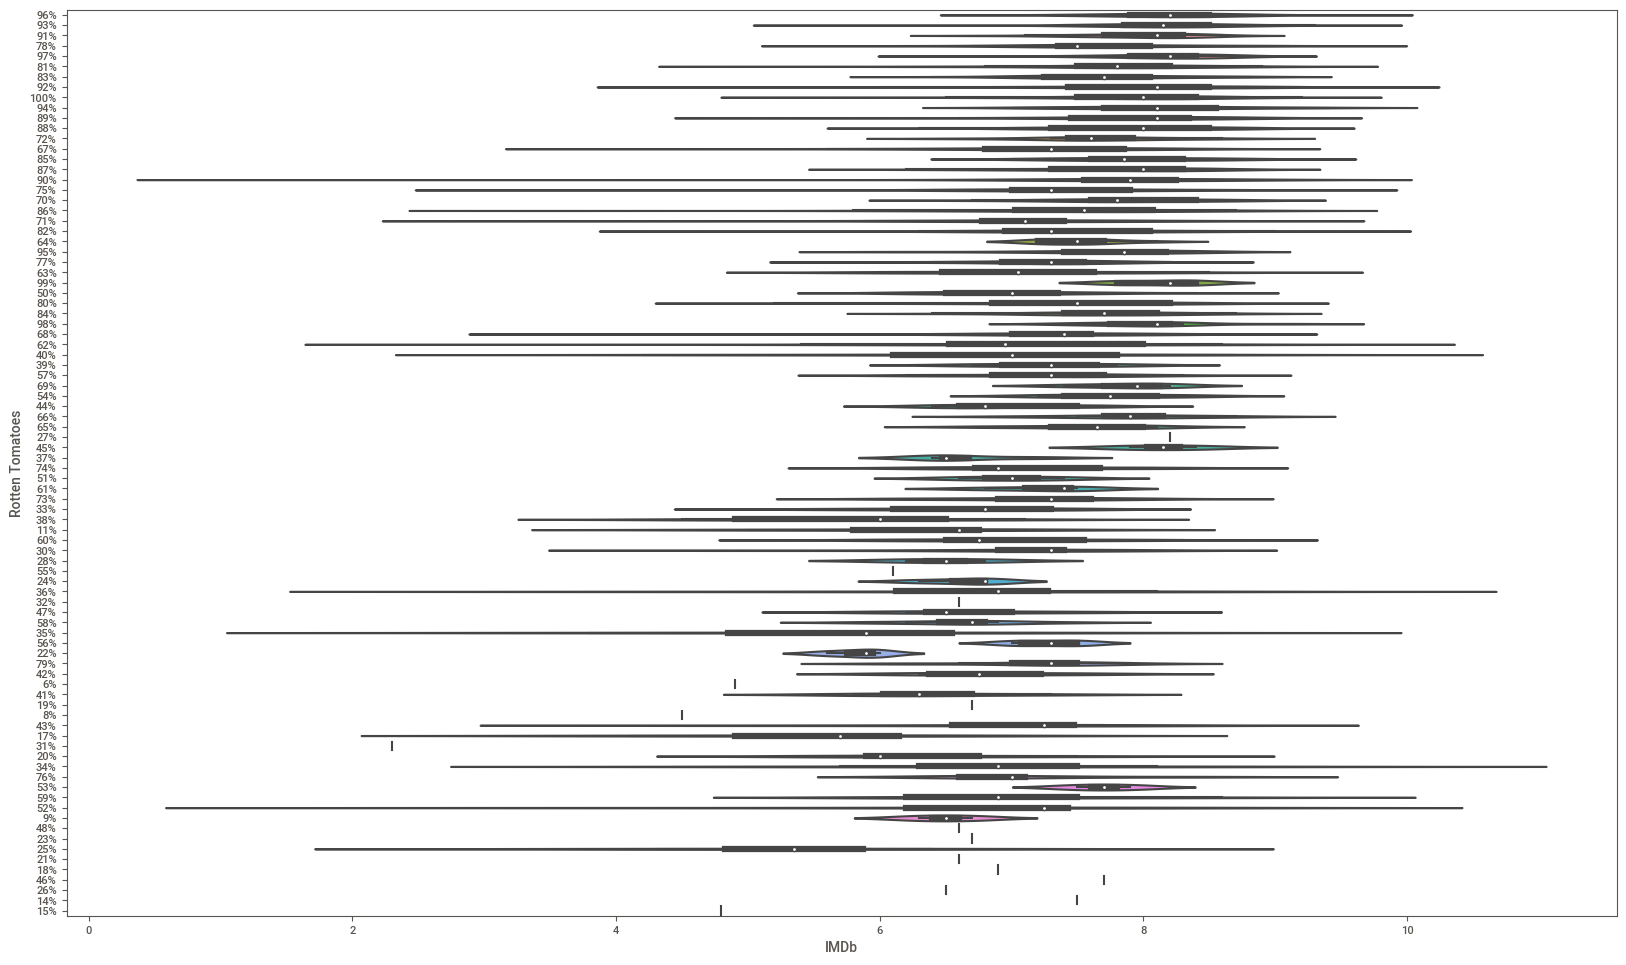

In [204]:
plt.figure(figsize=(20,12))
sns.violinplot(x='IMDb',y='Rotten Tomatoes',data=df_tv)

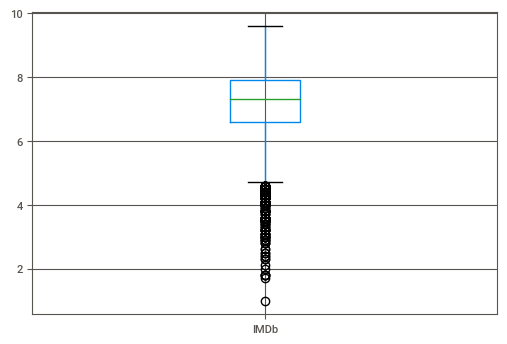

In [205]:
df_tv.boxplot(column='IMDb')

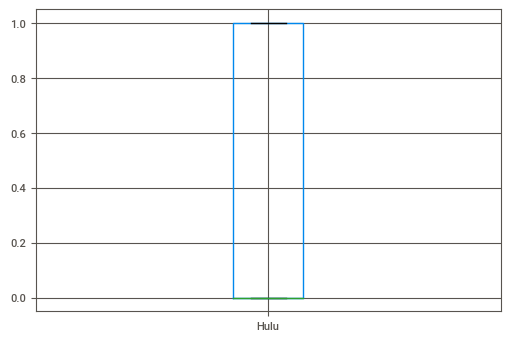

In [206]:
df_tv.boxplot(column='Hulu')

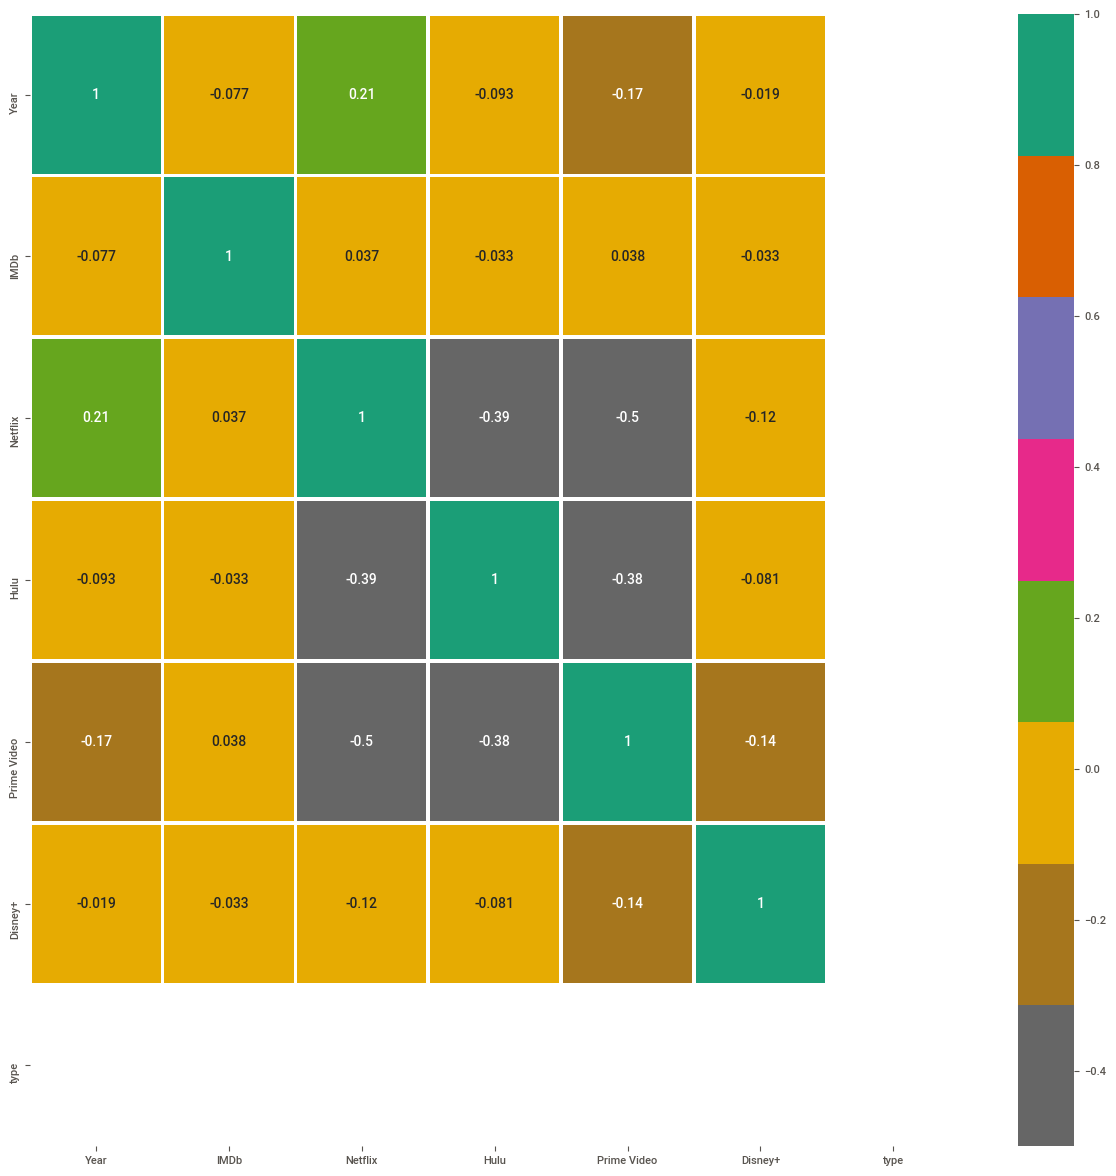

In [207]:
plt.figure(figsize=(15,15))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_tv.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [208]:
df_movie.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
plt.scatter(df_movie[['IMDb']],df_movie['Runtime'])

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(x='IMDb',y='Runtime',data=df_movie)
plt.xticks(rotation = 90)

In [ ]:
plt.figure(figsize=(10,10))
df_movie.hist()